In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
import statsmodels as sms
import warnings

warnings.simplefilter("ignore")

In [143]:
data_2223 = pd.read_csv("seeding_metrics_wiaa_gbb_2023.csv").sort_values(by=["Division", "Sectional", "Seed"]).drop_duplicates().reset_index(drop=True)

In [144]:
data_2223.head(10)

,Team,WP,OWP,DOWP,OOWP,DOOWP,Division,Sectional,Seed,Year
0,Neenah,0.95652,0.58158,0.59226,0.56107,0.58390,1,1A,1,2023
1,Superior,0.95238,0.53456,0.52417,0.51532,0.53143,1,1A,2,2023
2,Hortonville,0.86364,0.61972,0.58710,0.55254,0.56861,1,1A,3,2023
3,Hudson,0.86364,0.60000,0.55636,0.54941,0.52959,1,1A,4,2023
4,Eau Claire Memorial,0.76190,0.55754,0.49609,0.53870,0.53768,1,1A,5,2023
5,Marshfield,0.78261,0.55204,0.46429,0.54013,0.54103,1,1A,6,2023
6,Wausau West,0.61905,0.54157,0.44344,0.55554,0.53065,1,1A,7,2023
7,Stevens Point,0.68182,0.50714,0.39592,0.53988,0.55217,1,1A,8,2023
8,Oshkosh West,0.65217,0.49292,0.35417,0.55354,0.54250,1,1A,9,2023
9,Appleton East,0.47826,0.61003,0.48333,0.54358,0.54667,1,1A,10,2023


In [145]:
d1s1a = data_2223[(data_2223["Division"] == 1) & (data_2223["Sectional"] == "1A")].reset_index(drop=True)
d1s2a = data_2223[(data_2223["Division"] == 1) & (data_2223["Sectional"] == "2A")].reset_index(drop=True)
d1s3a = data_2223[(data_2223["Division"] == 1) & (data_2223["Sectional"] == "3A")].reset_index(drop=True)
d1s4a = data_2223[(data_2223["Division"] == 1) & (data_2223["Sectional"] == "4A")].reset_index(drop=True)
d2s1a = data_2223[(data_2223["Division"] == 2) & (data_2223["Sectional"] == "1A")].reset_index(drop=True)
d2s1b = data_2223[(data_2223["Division"] == 2) & (data_2223["Sectional"] == "1B")].reset_index(drop=True)
d2s2a = data_2223[(data_2223["Division"] == 2) & (data_2223["Sectional"] == "2A")].reset_index(drop=True)
d2s2b = data_2223[(data_2223["Division"] == 2) & (data_2223["Sectional"] == "2B")].reset_index(drop=True)
d2s3a = data_2223[(data_2223["Division"] == 2) & (data_2223["Sectional"] == "3A")].reset_index(drop=True)
d2s3b = data_2223[(data_2223["Division"] == 2) & (data_2223["Sectional"] == "3B")].reset_index(drop=True)
d2s4a = data_2223[(data_2223["Division"] == 2) & (data_2223["Sectional"] == "4A")].reset_index(drop=True)
d2s4b = data_2223[(data_2223["Division"] == 2) & (data_2223["Sectional"] == "4B")].reset_index(drop=True)
d3s1a = data_2223[(data_2223["Division"] == 3) & (data_2223["Sectional"] == "1A")].reset_index(drop=True)
d3s1b = data_2223[(data_2223["Division"] == 3) & (data_2223["Sectional"] == "1B")].reset_index(drop=True)
d3s2a = data_2223[(data_2223["Division"] == 3) & (data_2223["Sectional"] == "2A")].reset_index(drop=True)
d3s2b = data_2223[(data_2223["Division"] == 3) & (data_2223["Sectional"] == "2B")].reset_index(drop=True)
d3s3a = data_2223[(data_2223["Division"] == 3) & (data_2223["Sectional"] == "3A")].reset_index(drop=True)
d3s3b = data_2223[(data_2223["Division"] == 3) & (data_2223["Sectional"] == "3B")].reset_index(drop=True)
d3s4a = data_2223[(data_2223["Division"] == 3) & (data_2223["Sectional"] == "4A")].reset_index(drop=True)
d3s4b = data_2223[(data_2223["Division"] == 3) & (data_2223["Sectional"] == "4B")].reset_index(drop=True)
d4s1a = data_2223[(data_2223["Division"] == 4) & (data_2223["Sectional"] == "1A")].reset_index(drop=True)
d4s1b = data_2223[(data_2223["Division"] == 4) & (data_2223["Sectional"] == "1B")].reset_index(drop=True)
d4s2a = data_2223[(data_2223["Division"] == 4) & (data_2223["Sectional"] == "2A")].reset_index(drop=True)
d4s2b = data_2223[(data_2223["Division"] == 4) & (data_2223["Sectional"] == "2B")].reset_index(drop=True)
d4s3a = data_2223[(data_2223["Division"] == 4) & (data_2223["Sectional"] == "3A")].reset_index(drop=True)
d4s3b = data_2223[(data_2223["Division"] == 4) & (data_2223["Sectional"] == "3B")].reset_index(drop=True)
d4s4a = data_2223[(data_2223["Division"] == 4) & (data_2223["Sectional"] == "4A")].reset_index(drop=True)
d4s4b = data_2223[(data_2223["Division"] == 4) & (data_2223["Sectional"] == "4B")].reset_index(drop=True)
d5s1a = data_2223[(data_2223["Division"] == 5) & (data_2223["Sectional"] == "1A")].reset_index(drop=True)
d5s1b = data_2223[(data_2223["Division"] == 5) & (data_2223["Sectional"] == "1B")].reset_index(drop=True)
d5s2a = data_2223[(data_2223["Division"] == 5) & (data_2223["Sectional"] == "2A")].reset_index(drop=True)
d5s2b = data_2223[(data_2223["Division"] == 5) & (data_2223["Sectional"] == "2B")].reset_index(drop=True)
d5s3a = data_2223[(data_2223["Division"] == 5) & (data_2223["Sectional"] == "3A")].reset_index(drop=True)
d5s3b = data_2223[(data_2223["Division"] == 5) & (data_2223["Sectional"] == "3B")].reset_index(drop=True)
d5s4a = data_2223[(data_2223["Division"] == 5) & (data_2223["Sectional"] == "4A")].reset_index(drop=True)
d5s4b = data_2223[(data_2223["Division"] == 5) & (data_2223["Sectional"] == "4B")].reset_index(drop=True)

In [146]:
d5s2b

,Team,WP,OWP,DOWP,OOWP,DOOWP,Division,Sectional,Seed,Year
0,Wabeno/Laona,0.72727,0.62664,0.52419,0.52389,0.51860,5,2B,1,2023
1,Sevastopol,0.95238,0.46891,0.40187,0.51599,0.50353,5,2B,2,2023
2,Lena,0.85714,0.47468,0.41091,0.49633,0.52648,5,2B,3,2023
3,Niagara,0.77273,0.47541,0.41364,0.52350,0.54941,5,2B,4,2023
4,Three Lakes,0.57143,0.54958,0.39614,0.51741,0.54261,5,2B,5,2023
5,Florence,0.61905,0.51840,0.39000,0.51227,0.50680,5,2B,6,2023
6,Suring,0.50000,0.58642,0.37821,0.51043,0.49747,5,2B,7,2023
7,Gillett,0.50000,0.44954,0.32683,0.50837,0.52269,5,2B,8,2023
8,Wausaukee,0.35000,0.51316,0.26126,0.50391,0.48589,5,2B,9,2023
9,Bowler,0.37500,0.43357,0.18421,0.46639,0.44098,5,2B,10,2023


In [147]:
import statsmodels.api as sms

In [148]:
# Define target variables - the seed
y = np.log(data_2223["Seed"].astype(float))
# Define the input variables
X = data_2223[["WP", "OWP", "DOWP", "OOWP", "DOOWP"]]
X = sms.add_constant(X)
print(X.head())

   const       WP      OWP     DOWP     OOWP    DOOWP
0    1.0  0.95652  0.58158  0.59226  0.56107  0.58390
1    1.0  0.95238  0.53456  0.52417  0.51532  0.53143
2    1.0  0.86364  0.61972  0.58710  0.55254  0.56861
3    1.0  0.86364  0.60000  0.55636  0.54941  0.52959
4    1.0  0.76190  0.55754  0.49609  0.53870  0.53768


In [149]:
big_mdl = sms.OLS(y, X)
mdl_fit = big_mdl.fit()

In [150]:
mdl_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Seed   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     261.8
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          4.10e-131
Time:                        16:06:20   Log-Likelihood:                -210.73
No. Observations:                 459   AIC:                             433.5
Df Residuals:                     453   BIC:                             458.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3061      0.396      8.344      0.000       2.527       4.085
WP            -2.4893      0.103    -24.157      0.000      -2.692      -2.287
OWP           -2.1987      0.454     -4.839      0.000      -3.092      -1.306
DOWP          -0.4679      0.243     -1.929      0.054      -0.945       0.009
OOWP           2.2125      1.520      1.455      0.146      -0.775       5.200
DOOWP         -0.3116      1.131     -0.276      0.783      -2.534       1.911
==============================================================================
Omnibus:                       10.303   Durbin-Watson:                   0.618
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.387
Skew:                          -0.338   Prob(JB):                      0.00555
Kurtosis:                       3.294   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
X_pred = d5s2b[["Team", "Seed", "WP", "OWP", "DOWP", "OOWP", "DOOWP"]]
X_pred = sms.add_constant(X_pred)
X_pred = X_pred[["Team", "Seed", "const", "WP", "OWP", "DOWP", "OOWP", "DOOWP"]]
X_pred.head()

,Team,Seed,const,WP,OWP,DOWP,OOWP,DOOWP
0,Wabeno/Laona,1,1.0,0.72727,0.62664,0.52419,0.52389,0.51860
1,Sevastopol,2,1.0,0.95238,0.46891,0.40187,0.51599,0.50353
2,Lena,3,1.0,0.85714,0.47468,0.41091,0.49633,0.52648
3,Niagara,4,1.0,0.77273,0.47541,0.41364,0.52350,0.54941
4,Three Lakes,5,1.0,0.57143,0.54958,0.39614,0.51741,0.54261


In [152]:
y_pred = mdl_fit.predict(X_pred.iloc[:, 2:])
print(y_pred)

0     0.870073
1     0.700953
2     0.870472
3     1.130683
4     1.465542
5     1.418216
6     1.569369
7     1.881954
8     2.147754
9     2.227552
10    2.528073
11    2.233913
12    2.817757
13    2.472031
dtype: float64


In [153]:
X_pred["Prediction"] = y_pred
X_pred["Exp_Pred"] = np.exp(X_pred["Prediction"])
X_pred = X_pred.sort_values(by="Exp_Pred").reset_index(drop=True)
X_pred["Predicted_Seed"] = X_pred.index+1
X_pred["Error"] = X_pred["Seed"] - X_pred["Predicted_Seed"]
X_pred

,Team,Seed,const,WP,OWP,DOWP,OOWP,DOOWP,Prediction,Exp_Pred,Predicted_Seed,Error
0,Sevastopol,2,1.0,0.95238,0.46891,0.40187,0.51599,0.50353,0.700953,2.015673,1,1
1,Wabeno/Laona,1,1.0,0.72727,0.62664,0.52419,0.52389,0.51860,0.870073,2.387085,2,-1
2,Lena,3,1.0,0.85714,0.47468,0.41091,0.49633,0.52648,0.870472,2.388037,3,0
3,Niagara,4,1.0,0.77273,0.47541,0.41364,0.52350,0.54941,1.130683,3.097772,4,0
4,Florence,6,1.0,0.61905,0.51840,0.39000,0.51227,0.50680,1.418216,4.129748,5,1
5,Three Lakes,5,1.0,0.57143,0.54958,0.39614,0.51741,0.54261,1.465542,4.329889,6,-1
6,Suring,7,1.0,0.50000,0.58642,0.37821,0.51043,0.49747,1.569369,4.803614,7,0
7,Gillett,8,1.0,0.50000,0.44954,0.32683,0.50837,0.52269,1.881954,6.566326,8,0
8,Wausaukee,9,1.0,0.35000,0.51316,0.26126,0.50391,0.48589,2.147754,8.565598,9,0
9,Bowler,10,1.0,0.37500,0.43357,0.18421,0.46639,0.44098,2.227552,9.277125,10,0


In [154]:
X_pred

,Team,Seed,const,WP,OWP,DOWP,OOWP,DOOWP,Prediction,Exp_Pred,Predicted_Seed,Error
0,Sevastopol,2,1.0,0.95238,0.46891,0.40187,0.51599,0.50353,0.700953,2.015673,1,1
1,Wabeno/Laona,1,1.0,0.72727,0.62664,0.52419,0.52389,0.51860,0.870073,2.387085,2,-1
2,Lena,3,1.0,0.85714,0.47468,0.41091,0.49633,0.52648,0.870472,2.388037,3,0
3,Niagara,4,1.0,0.77273,0.47541,0.41364,0.52350,0.54941,1.130683,3.097772,4,0
4,Florence,6,1.0,0.61905,0.51840,0.39000,0.51227,0.50680,1.418216,4.129748,5,1
5,Three Lakes,5,1.0,0.57143,0.54958,0.39614,0.51741,0.54261,1.465542,4.329889,6,-1
6,Suring,7,1.0,0.50000,0.58642,0.37821,0.51043,0.49747,1.569369,4.803614,7,0
7,Gillett,8,1.0,0.50000,0.44954,0.32683,0.50837,0.52269,1.881954,6.566326,8,0
8,Wausaukee,9,1.0,0.35000,0.51316,0.26126,0.50391,0.48589,2.147754,8.565598,9,0
9,Bowler,10,1.0,0.37500,0.43357,0.18421,0.46639,0.44098,2.227552,9.277125,10,0


In [155]:
X_pred = d5s2a[["Team", "Seed", "WP", "OWP", "DOWP", "OOWP", "DOOWP"]]
X_pred = sms.add_constant(X_pred)
X_pred = X_pred[["Team", "Seed", "const", "WP", "OWP", "DOWP", "OOWP", "DOOWP"]]
X_pred.head()

,Team,Seed,const,WP,OWP,DOWP,OOWP,DOOWP
0,Assumption,1,1.0,0.80952,0.55079,0.54154,0.52879,0.52598
1,Edgar,2,1.0,0.77273,0.51685,0.47678,0.52843,0.53692
2,Athens,3,1.0,0.86957,0.45740,0.39833,0.53085,0.52574
3,Iola-Scandinavia,4,1.0,0.75000,0.49340,0.41631,0.49688,0.51113
4,Almond-Bancroft,5,1.0,0.86364,0.36387,0.35599,0.47081,0.44495


In [156]:
y_pred = mdl_fit.predict(X_pred.iloc[:, 2:])
X_pred["Prediction"] = y_pred
X_pred["Exp_Pred"] = np.exp(X_pred["Prediction"])
X_pred = X_pred.sort_values(by="Exp_Pred").reset_index(drop=True)
X_pred["Predicted_Seed"] = X_pred.index+1
X_pred["Error"] = X_pred["Seed"] - X_pred["Predicted_Seed"]
X_pred

,Team,Seed,const,WP,OWP,DOWP,OOWP,DOOWP,Prediction,Exp_Pred,Predicted_Seed,Error
0,Assumption,1,1.0,0.80952,0.55079,0.54154,0.52879,0.52598,0.832521,2.299108,1,0
1,Athens,3,1.0,0.86957,0.45740,0.39833,0.53085,0.52574,0.960016,2.611738,2,1
2,Edgar,2,1.0,0.77273,0.51685,0.47678,0.52843,0.53692,1.024825,2.786607,3,-1
3,Almond-Bancroft,5,1.0,0.86364,0.36387,0.35599,0.47081,0.44495,1.092575,2.981943,4,1
4,Iola-Scandinavia,4,1.0,0.75000,0.49340,0.41631,0.49688,0.51113,1.099494,3.002647,5,-1
5,Columbus Catholic,6,1.0,0.60870,0.55013,0.36316,0.53009,0.54700,1.413672,4.111025,6,0
6,Rosholt,8,1.0,0.54545,0.48794,0.33184,0.49232,0.52329,1.646340,5.187958,7,1
7,Pacelli,9,1.0,0.50000,0.51436,0.37126,0.49665,0.48403,1.704761,5.500073,8,1
8,Gresham,10,1.0,0.57143,0.42597,0.31126,0.47993,0.47687,1.714605,5.554484,9,1
9,Newman Catholic,7,1.0,0.50000,0.52010,0.37981,0.52054,0.51833,1.730307,5.642389,10,-3


In [200]:
weights = np.random.dirichlet(np.array([0.45, 0.40, 0.05, 0.05, 0.05]), size=100000)

In [201]:
weights_df = pd.DataFrame(weights).rename(columns={
    0: "w1",
    1: "w2",
    2: "w3",
    3: "w4",
    4: "w5"
})
weights_df["Error"] = [None]*len(weights_df)
weights_df["MAE"] = [None]*len(weights_df)

In [202]:
weights_df.head()

,w1,w2,w3,w4,w5,Error,MAE
0,0.970085,0.021801,4.455909e-07,7.670087e-03,4.428938e-04,None,None
1,0.119499,0.821013,5.948692e-02,1.079216e-06,4.294131e-08,None,None
2,0.999539,0.000421,3.817950e-11,4.039298e-05,2.318527e-11,None,None
3,0.054552,0.945448,3.291757e-20,1.878720e-11,6.598745e-29,None,None
4,0.297739,0.671182,2.837608e-02,1.120245e-05,2.691541e-03,None,None


In [203]:
weights_df.iloc[1, :].values

array([0.11949891276897276, 0.8210130450331461, 0.059486920041059675,
       1.0792155127890024e-06, 4.294130848157424e-08, None, None],
      dtype=object)

### Testing weights
Trying out weights of the distribution. We center the weight of the seeding critierion about 0.2 (evenly split data) and go from there. We need code that:
- Calculates the prediction based on the weights
- Based on the outputted calculations, get the sectional seeding
- Compare the predicted seeds to the actual seeds by calculating and summing the total absolute error
- Compile a list of candidate weights for the seeding
- See if we can get a list of parameters

In [204]:
# Create a few empty columns with the predictions
data_2223["Score"] = [None] * len(data_2223)
data_2223["Predicted_Seed"] = [None] * len(data_2223)
data_2223["Error"] = [None] * len(data_2223)
# Run through and calculate the DataFrame
for i in range(len(weights_df)):
    # Calculate the statistic used for predictions
    for j in range(len(data_2223)):
        #rint("Weights combination: " + str(i) + ", Observation: " + str(j))
        # Calculate the predictions
        data_2223.at[j, "Score"] = weights_df.at[i, "w1"] * data_2223.at[j, "WP"] +\
                                   weights_df.at[i, "w2"] * data_2223.at[j, "OWP"] +\
                                   weights_df.at[i, "w3"] * data_2223.at[j, "DOWP"] +\
                                   weights_df.at[i, "w4"] * data_2223.at[j, "OOWP"] +\
                                   weights_df.at[i, "w5"] * data_2223.at[j, "DOOWP"]
    # Organize the DataFrame by Division, Sectional, and Prediction
    data_2223 = data_2223.sort_values(by=[
        "Division",
        "Sectional",
        "Score"
    ]).reset_index(drop=True)
    # Calculate the seeds
    data_2223["Predicted_Seed"] = data_2223.groupby(["Division", "Sectional"]).cumcount(ascending=False) + 1
    data_2223["Error"] = np.abs(data_2223["Seed"] - data_2223["Predicted_Seed"])
    # Calculate the total absolute error and average the data by average miss
    error = np.sum(data_2223["Error"])
    mae = error / len(data_2223["Error"])
    # Write the error and MAE to the dataframe
    weights_df.at[i, "Error"] = error
    weights_df.at[i, "MAE"] = mae

In [189]:
weights_df = weights_df.sort_values(by="MAE", ascending=True).reset_index(drop=True).head(25)

In [190]:
candidates = weights_df[weights_df["MAE"] < 0.5].reset_index(drop=True)
candidates.describe()

,w1,w2,w3,w4,w5
count,1.000000,1.000000,1.000000e+00,1.000000e+00,1.00000
mean,0.462479,0.421261,3.070795e-21,3.970173e-11,0.11626
std,NaN,NaN,NaN,NaN,NaN
min,0.462479,0.421261,3.070795e-21,3.970173e-11,0.11626
25%,0.462479,0.421261,3.070795e-21,3.970173e-11,0.11626
50%,0.462479,0.421261,3.070795e-21,3.970173e-11,0.11626
75%,0.462479,0.421261,3.070795e-21,3.970173e-11,0.11626
max,0.462479,0.421261,3.070795e-21,3.970173e-11,0.11626


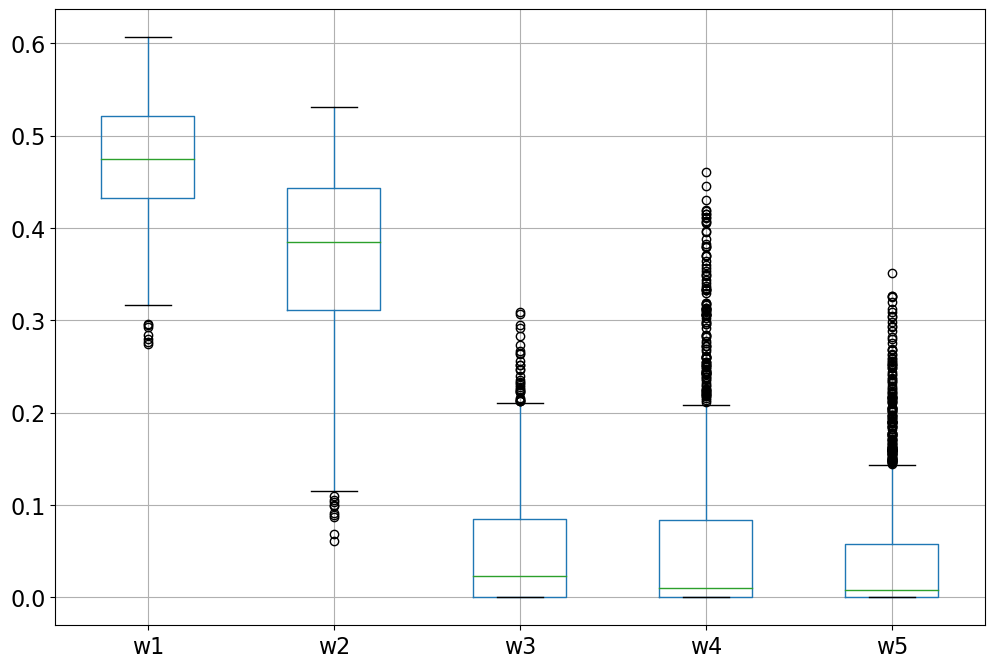

In [56]:
candidates.boxplot(column=["w1", "w2", "w3", "w4", "w5"], fontsize=16, rot=0, grid=True, figsize=(12,8))
plt.show()

In [57]:
median_weights = candidates.iloc[:, 0:5].median().values
median_weights

array([0.4746667 , 0.38459114, 0.02325903, 0.01011468, 0.00797359])

In [58]:
mean_weights = candidates.iloc[:, 0:5].mean().values
mean_weights

array([0.4742103 , 0.3708994 , 0.05149644, 0.05971157, 0.04368229])

In [106]:
for j in range(len(data_2223)):
    # Calculate the predictions
    data_2223.at[j, "Score"] = weights_df.at[0, "w1"] * data_2223.at[j, "WP"] +\
                               weights_df.at[0, "w2"] * data_2223.at[j, "OWP"] +\
                               weights_df.at[0, "w3"] * data_2223.at[j, "DOWP"] +\
                               weights_df.at[0, "w4"] * data_2223.at[j, "OOWP"] +\
                               weights_df.at[0, "w5"] * data_2223.at[j, "DOOWP"]
# Organize the DataFrame by Division, Sectional, and Prediction
data_2223 = data_2223.sort_values(by=[
    "Division",
    "Sectional",
    "Score"
]).reset_index(drop=True)
# Calculate the seeds
data_2223["Predicted_Seed"] = data_2223.groupby(["Division", "Sectional"]).cumcount(ascending=False) + 1
data_2223["Error"] = np.abs(data_2223["Seed"] - data_2223["Predicted_Seed"])

In [107]:
total_abs_error = np.sum(data_2223["Error"])
print(total_abs_error)

196


In [108]:
mae = total_abs_error / len(data_2223)
print(mae)

0.42701525054466233


In [111]:
data_2223[(data_2223["Division"] == 5) & (data_2223["Sectional"] =="2A")].sort_values(by="Seed").reset_index(drop=True)

,Team,WP,OWP,DOWP,OOWP,DOOWP,Division,Sectional,Seed,Year,Score,Predicted_Seed,Error
0,Assumption,0.80952,0.55079,0.54154,0.52879,0.52598,5,2A,1,2023,0.658358,1,0
1,Edgar,0.77273,0.51685,0.47678,0.52843,0.53692,5,2A,2,2023,0.628599,3,1
2,Athens,0.86957,0.45740,0.39833,0.53085,0.52574,5,2A,3,2023,0.644446,2,1
3,Iola-Scandinavia,0.75000,0.49340,0.41631,0.49688,0.51113,5,2A,4,2023,0.601744,4,0
4,Almond-Bancroft,0.86364,0.36387,0.35599,0.47081,0.44495,5,2A,5,2023,0.596016,5,0
5,Columbus Catholic,0.60870,0.55013,0.36316,0.53009,0.54700,5,2A,6,2023,0.558484,6,0
6,Newman Catholic,0.50000,0.52010,0.37981,0.52054,0.51833,5,2A,7,2023,0.498525,8,1
7,Rosholt,0.54545,0.48794,0.33184,0.49232,0.52329,5,2A,8,2023,0.505581,7,1
8,Pacelli,0.50000,0.51436,0.37126,0.49665,0.48403,5,2A,9,2023,0.489843,9,0
9,Gresham,0.57143,0.42597,0.31126,0.47993,0.47687,5,2A,10,2023,0.488504,10,0


In [112]:
data_2223[(data_2223["Division"] == 5) & (data_2223["Sectional"] =="2B")].sort_values(by="Seed").reset_index(drop=True)

,Team,WP,OWP,DOWP,OOWP,DOOWP,Division,Sectional,Seed,Year,Score,Predicted_Seed,Error
0,Wabeno/Laona,0.72727,0.62664,0.52419,0.52389,0.51860,5,2B,1,2023,0.641777,3,2
1,Sevastopol,0.95238,0.46891,0.40187,0.51599,0.50353,5,2B,2,2023,0.680224,1,1
2,Lena,0.85714,0.47468,0.41091,0.49633,0.52648,5,2B,3,2023,0.645332,2,1
3,Niagara,0.77273,0.47541,0.41364,0.52350,0.54941,5,2B,4,2023,0.613126,4,0
4,Three Lakes,0.57143,0.54958,0.39614,0.51741,0.54261,5,2B,5,2023,0.544194,6,1
5,Florence,0.61905,0.51840,0.39000,0.51227,0.50680,5,2B,6,2023,0.548787,5,1
6,Suring,0.50000,0.58642,0.37821,0.51043,0.49747,5,2B,7,2023,0.513996,7,0
7,Gillett,0.50000,0.44954,0.32683,0.50837,0.52269,5,2B,8,2023,0.473954,8,0
8,Wausaukee,0.35000,0.51316,0.26126,0.50391,0.48589,5,2B,9,2023,0.414586,9,0
9,Bowler,0.37500,0.43357,0.18421,0.46639,0.44098,5,2B,10,2023,0.387175,11,1


In [113]:
for j in range(len(data_2223)):
    # Calculate the predictions
    data_2223.at[j, "Score"] = 0.45 * data_2223.at[j, "WP"] +\
                                0.40 * data_2223.at[j, "OWP"] +\
                                0.05 * data_2223.at[j, "DOWP"] +\
                                0.05 * data_2223.at[j, "OOWP"] +\
                                0.05 * data_2223.at[j, "DOOWP"]
# Organize the DataFrame by Division, Sectional, and Prediction
data_2223 = data_2223.sort_values(by=[
    "Division",
    "Sectional",
    "Score"
]).reset_index(drop=True)
# Calculate the seeds
data_2223["Predicted_Seed"] = data_2223.groupby(["Division", "Sectional"]).cumcount(ascending=False) + 1
data_2223["Error"] = np.abs(data_2223["Seed"] - data_2223["Predicted_Seed"])

In [141]:
print("Total error: "+str(np.sum(data_2223["Error"])))
print("Mean absolute error: "+str(np.sum(data_2223["Error"]/len(data_2223))))

Total error: 200
Mean absolute error: 0.4357298474945534


In [140]:
data_2223[(data_2223["Division"] == 1) & (data_2223["Sectional"].str.contains("1"))].sort_values(by=["Sectional", "Seed"]).reset_index(drop=True)

,Team,WP,OWP,DOWP,OOWP,DOOWP,Division,Sectional,Seed,Year,Score,Predicted_Seed,Error
0,Neenah,0.95652,0.58158,0.59226,0.56107,0.58390,1,1A,1,2023,0.758807,1,0
1,Superior,0.95238,0.53456,0.52417,0.51532,0.53143,1,1A,2,2023,0.730874,2,0
2,Hortonville,0.86364,0.61972,0.58710,0.55254,0.56861,1,1A,3,2023,0.727466,3,0
3,Hudson,0.86364,0.60000,0.55636,0.54941,0.52959,1,1A,4,2023,0.716677,4,0
4,Eau Claire Memorial,0.76190,0.55754,0.49609,0.53870,0.53768,1,1A,5,2023,0.649293,6,1
5,Marshfield,0.78261,0.55204,0.46429,0.54013,0.54103,1,1A,6,2023,0.655668,5,1
6,Wausau West,0.61905,0.54157,0.44344,0.55554,0.53065,1,1A,7,2023,0.573616,8,1
7,Stevens Point,0.68182,0.50714,0.39592,0.53988,0.55217,1,1A,8,2023,0.58817,7,1
8,Oshkosh West,0.65217,0.49292,0.35417,0.55354,0.54250,1,1A,9,2023,0.567078,9,0
9,Appleton East,0.47826,0.61003,0.48333,0.54358,0.54667,1,1A,10,2023,0.534283,11,1


```python
data_2223.to_excel("seeding_preds_mean_model.xlsx", index=False)
```